In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn


Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# just need to load the data for plotting 
qr_data = quantileRegression("data")
qr_dataE = quantileRegression("data")
qr_dataF = quantileRegression("data")
qr_dataG = quantileRegression("data")
qr_dataH = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 1000000
print "Load the data dataframe"
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016D[1])
qr_dataE.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016E[0],rn.run2016E[1])
qr_dataF.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016F[0],rn.run2016F[1])
qr_dataG.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016G[0],rn.run2016G[1])
qr_dataH.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016H[0],rn.run2016H[1])
dfdata = qr_data.getDF()
dfdataE = qr_dataE.getDF()
dfdataF = qr_dataF.getDF()
dfdataG = qr_dataG.getDF()
dfdataH = qr_dataH.getDF()

Load the data dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'puweight', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadScEnergy', 'leadScPreshowerEnergy', 'leadSigmaRR', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadPhoIDMVA', 'leadR9', 'leadS4', 'leadEtaWidth', 'leadPhiWidth', 'leadSigmaIeIe', 'leadCovarianceIetaIphi', 'leadCovarianceIphiIphi', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadScEnergy', 'subleadScPreshowerEnergy', 'subleadSigmaRR', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subLeadPhoIDMVA', 'subleadR9', 'subleadS4', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadSigmaIeIe', 'subleadCovarianceIetaIphi', 'subleadCovarianceIphiIphi']
trees:  ['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEL

In [5]:
# Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

['R9']
plotting  R9


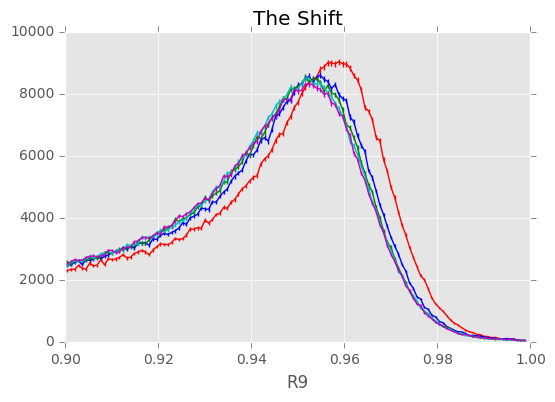

In [7]:
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.9,1.0,0.0008)
        rv3 = np.arange(0.5,0.95,0.008)
        
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.0,0.015,0.0001)
        rv2 = np.arange(0.015,0.030,0.0001)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0001)
        rv2 = np.arange(0.005,0.025,0.0001)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.001)
        rv2 = np.arange(0.0,0.05,0.0003)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0001)
        rv2 = np.arange(0.02, 0.05,0.0005)
    if yvar == "SigmaRR":
        rv = np.arange(1, 12.0,0.1) 
        rv2 = np.arange(1, 12.0,0.1)
    if yvar == "CovarianceIetaIphi":
        rv = np.arange(-0.0002, 0.0002,0.0000001) 
        rv2 = np.arange(-0.00005, 0.00005,0.0000001)
    if yvar == "PhoIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0,0.05)
    if yvar == "ChIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.,0.05)
    if yvar == "ChIso03worst":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0, 0.05)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    
    #compute histograms:

    
    data_bins, _edges = np.histogram(dfdata[yvar], rv2)
    data_binsE, _edges = np.histogram(dfdataE[yvar], rv2)
    data_binsF, _edges = np.histogram(dfdataF[yvar], rv2)
    data_binsG, _edges = np.histogram(dfdataG[yvar], rv2)
    data_binsH, _edges = np.histogram(dfdataH[yvar], rv2)
    edges = _edges[:len(_edges)-1]
    
    #calculate error:
    edges = _edges[:len(_edges)-1]
    bincenters = 0.5*(_edges[1:]+_edges[:-1])
    width      = 0
    menStddata     = np.sqrt(data_bins)
    menStddataE     = np.sqrt(data_binsE)
    menStddataF     = np.sqrt(data_binsF)
    menStddataG     = np.sqrt(data_binsG)
    menStddataH     = np.sqrt(data_binsH)
    
    #plot it
    plt.errorbar(bincenters, data_bins, yerr=menStddata, color='r', capsize=0)
    plt.errorbar(bincenters, data_binsE, yerr=menStddataE, color='b', capsize=0)
    plt.errorbar(bincenters, data_binsF, yerr=menStddataF, color='g', capsize=0)
    plt.errorbar(bincenters, data_binsG, yerr=menStddataG, color='c', capsize=0)
    plt.errorbar(bincenters, data_binsH, yerr=menStddataH, color='m', capsize=0)
    
    ax.set_title('The Shift')
    
    